In [1]:
# d3 利用 matplotlib 分析知乎文章相关数据并制作可视化图表
import pandas as pd
from matplotlib import pyplot as plt

# 显示图表中的中文字符 mac可设为Hiragino Sans GB,windows可设为SimHei
plt.rcParams['font.sans-serif'] =['Hiragino Sans GB']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# task1--读取 CSV 格式文件“task_3.1_zhihu_timeline_answer.csv”，将数据命名为 zhihu_data_answer，
# 并查看前部数据;
zhihu_data_answer = pd.read_csv('/Users/apple/Desktop/task_3.1_zhihu_timeline_answer.csv')
print(zhihu_data_answer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   类型      1029 non-null   object
 1   id      1029 non-null   object
 2   标签      1029 non-null   object
 3   回答id    1029 non-null   int64 
 4   回答点赞数   1029 non-null   int64 
 5   回答评论数   1029 non-null   int64 
 6   回答感谢数   1029 non-null   int64 
 7   回答观看数   1029 non-null   int64 
 8   回答创建时间  1029 non-null   int64 
 9   问题id    1029 non-null   int64 
 10  问题题目    1029 non-null   object
 11  问题回答数   1029 non-null   int64 
 12  问题关注数   1029 non-null   int64 
 13  评论数     1029 non-null   int64 
 14  创建时间    1029 non-null   int64 
dtypes: int64(11), object(4)
memory usage: 120.7+ KB
None


In [3]:
print(zhihu_data_answer.describe())

               回答id          回答点赞数         回答评论数          回答感谢数         回答观看数  \
count  1.029000e+03    1029.000000   1029.000000    1029.000000  1.029000e+03   
mean   8.378231e+08    7849.689990    633.607386    2611.756074  7.653330e+05   
std    8.545346e+07   17337.326711   1492.118807    7845.849610  1.077374e+06   
min    1.162789e+08       0.000000      0.000000       0.000000  1.000000e+01   
25%    8.081958e+08     408.000000     56.000000      53.000000  6.079900e+04   
50%    8.577429e+08    2291.000000    228.000000     292.000000  3.246180e+05   
75%    8.950267e+08    8074.000000    631.000000    1248.000000  1.028761e+06   
max    9.121103e+08  295573.000000  29908.000000  102612.000000  9.005343e+06   

             回答创建时间          问题id          问题回答数          问题关注数          评论数  \
count  1.029000e+03  1.029000e+03    1029.000000    1029.000000  1029.000000   
mean   1.569282e+09  2.476608e+08    2363.181730   24754.673469    45.656948   
std    8.156966e+06  1.257015e

In [4]:
print(zhihu_data_answer.head())

       类型                 id   标签       回答id  回答点赞数  回答评论数  回答感谢数    回答观看数  \
0  answer  12_1574824946.178  二次元  734170020   4859    656    564  1120728   
1  answer   13_1574824946.45   生活  629465796  46827   1594  12491  4517999   
2  answer  14_1574824946.791   高考  344182099  25739   2465   5072  1575771   
3  answer  15_1574824946.795   网恋  792191898   8948   1938    965  1261527   
4  answer  17_1574824946.818   健康  868188823    884    246    235   329706   

       回答创建时间       问题id                  问题题目  问题回答数  问题关注数  评论数        创建时间  
0  1561974232   62972819  你们见过最好看的 coser 长什么样？   1607  30094   30  1501051575  
1  1553236233   63894266          生活中有哪些残忍的真相？   2505  57217   50  1502701040  
2  1521306846  266837866  你们是怎么考上 985 的，每科多少分？   3527  28092   64  1518015871  
3  1566029684  270608371         网恋奔现失败是种什么体验？   5751  28491  122  1522496497  
4  1571893264   27128132              如何有效地戒糖？    500  19048   33  1418828372  


In [5]:
# task2--提取“task_3.1_zhihu_timeline_answer.csv”中【回答点赞数】和【回答感谢数】列数据，制成散点图，
# 观察两者的关系
a = zhihu_data_answer.loc[:,['回答点赞数','回答感谢数']]
print(type(a))
print('-'*30)
print(a)

<class 'pandas.core.frame.DataFrame'>
------------------------------
      回答点赞数  回答感谢数
0      4859    564
1     46827  12491
2     25739   5072
3      8948    965
4       884    235
...     ...    ...
1024    947    551
1025      0      0
1026   3608    212
1027   1161    192
1028   5154    665

[1029 rows x 2 columns]


In [6]:
# 设置横坐标轴
a_x = a['回答点赞数'].values.tolist()
print(a_x)

[4859, 46827, 25739, 8948, 884, 1686, 4, 95, 5968, 612, 295573, 11315, 7697, 10368, 196, 36898, 3913, 1216, 2490, 7567, 11753, 1112, 2224, 235, 15, 1282, 2084, 40631, 3, 2746, 2476, 614, 22, 5546, 628, 1437, 12470, 1745, 2, 754, 934, 10524, 834, 781, 838, 2067, 2082, 3645, 7044, 31302, 2882, 129, 3, 12466, 10569, 15252, 47, 3199, 846, 58, 28080, 1328, 10508, 2, 5994, 6512, 11087, 541, 80, 258, 1098, 13, 1172, 2443, 8673, 60874, 5106, 3287, 1350, 5884, 13786, 7437, 3569, 9899, 145, 22274, 3297, 459, 28484, 3210, 816, 432, 17259, 11, 814, 11784, 2415, 15, 29, 136, 1, 502, 171, 777, 5226, 16, 5653, 2160, 2265, 4568, 11444, 172, 2393, 10226, 1263, 1922, 20344, 2367, 4867, 45, 1060, 6302, 4172, 2770, 3576, 1508, 29485, 43637, 25239, 442, 296, 1156, 10, 196, 3060, 18605, 7438, 347, 391, 13520, 17779, 2885, 842, 2527, 16494, 5975, 521, 3980, 588, 6399, 746, 9449, 5673, 32, 20478, 4689, 0, 21278, 26214, 28, 5095, 16198, 3264, 1316, 15, 806, 0, 149, 36966, 9137, 26552, 24421, 14224, 7941, 2254,

In [7]:
# 设置纵坐标轴
a_y = a['回答感谢数'].tolist()
print(a_y)

[564, 12491, 5072, 965, 235, 142, 1, 19, 2332, 46, 70302, 3812, 3322, 1412, 19, 32919, 2057, 1106, 1349, 1528, 6390, 177, 139, 13, 12, 222, 441, 5329, 2, 180, 1505, 398, 5, 282, 108, 161, 1655, 238, 0, 47, 341, 1280, 117, 64, 92, 317, 246, 253, 1468, 21488, 344, 3, 0, 7742, 753, 7084, 3, 155, 667, 5, 1459, 303, 540, 0, 862, 724, 967, 185, 5, 288, 194, 1, 77, 1476, 3356, 31233, 2092, 635, 169, 938, 787, 398, 418, 6394, 9, 5365, 379, 193, 2538, 209, 259, 64, 880, 0, 282, 5621, 462, 3, 10, 8, 0, 82, 25, 210, 1197, 0, 1762, 217, 370, 394, 5079, 39, 150, 5044, 159, 109, 11600, 302, 279, 8, 453, 366, 445, 238, 436, 55, 9705, 13883, 7867, 128, 51, 287, 2, 75, 1203, 2991, 1022, 46, 96, 776, 3379, 805, 117, 278, 1227, 2305, 75, 291, 175, 369, 45, 763, 1190, 5, 1573, 255, 0, 17842, 17898, 8, 510, 3231, 521, 519, 1, 193, 0, 10, 12308, 3444, 3795, 2823, 7179, 6199, 515, 164, 36, 7686, 112, 1, 989, 424, 2393, 0, 92, 41, 0, 135, 1286, 9854, 188, 337, 60, 254, 94, 6, 158, 130, 512, 11034, 5062, 27349

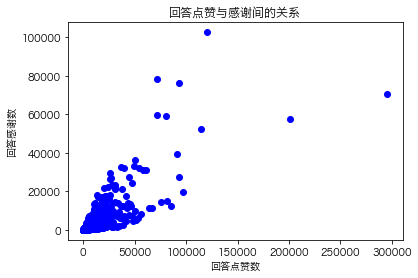

In [8]:
# 调用plt，作散点图
# plt.scatter（横坐标数值，纵坐标数值，颜色，标记符号）
plt.scatter(a_x,a_y,color = 'b',marker='o')
# 设置图片标题
plt.title('回答点赞与感谢间的关系')
# 设置横坐标标签
plt.xlabel('回答点赞数')
# 设置纵坐标标签
plt.ylabel('回答感谢数')
# 设置图片大小
plt.rcParams['figure.figsize'] = (25,15)
# 展示图片
plt.show()

In [9]:
# task3--提取“task_3.1_zhihu_timeline_answer.csv”中【问题回答数】和【问题关注数】列数据，
# 制成散点图， 观察两者的关系;
b = zhihu_data_answer.loc[:,['问题回答数','问题关注数']]
print(b)

      问题回答数  问题关注数
0      1607  30094
1      2505  57217
2      3527  28092
3      5751  28491
4       500  19048
...     ...    ...
1024    232   5810
1025    809   3309
1026   4929  64602
1027    135   2436
1028    594  18323

[1029 rows x 2 columns]


In [10]:
# 设置横坐标轴
b_x = b['问题回答数'].values.tolist()
print(b_x)

[1607, 2505, 3527, 5751, 500, 636, 14628, 919, 437, 213, 3062, 4759, 519, 1211, 358, 5282, 684, 95, 669, 2232, 70, 1307, 919, 258, 74, 1345, 9867, 4929, 190, 618, 1069, 40, 1570, 1662, 241, 138, 4383, 88, 41, 2021, 4820, 834, 46, 108, 136, 4153, 2499, 4243, 3339, 491, 5252, 1127, 24, 3411, 2159, 180, 445, 2717, 55, 1617, 4313, 260, 625, 217, 1814, 2376, 12862, 353, 626, 22, 4720, 14628, 1093, 396, 5718, 4286, 409, 3161, 378, 2154, 4401, 715, 7669, 3235, 135, 1808, 2197, 776, 4401, 2717, 529, 322, 5883, 4406, 1036, 3660, 744, 4401, 6611, 252, 273, 1245, 96, 219, 88, 966, 263, 793, 441, 74, 1074, 2426, 51, 463, 126, 1418, 288, 661, 5423, 108, 172, 2821, 382, 7669, 98, 344, 15277, 992, 803, 214, 953, 437, 530, 46, 92, 1348, 3350, 462, 30, 3649, 1609, 1247, 4748, 8888, 217, 347, 1169, 26, 353, 287, 176, 583, 1151, 40, 1196, 1279, 3883, 1412, 259, 1458, 8530, 8149, 57667, 50, 899, 41, 142, 17439, 3405, 1471, 146, 322, 1505, 1432, 1265, 410, 287, 1028, 8149, 123, 50, 1580, 1905, 721, 71, 336

In [11]:
# 设置纵坐标轴
b_y = b['问题关注数'].tolist()
print(b_y)

[30094, 57217, 28092, 28491, 19048, 3814, 129885, 15872, 117434, 3686, 76310, 50435, 12817, 11016, 1318, 237105, 21729, 1596, 15058, 33741, 7551, 4712, 7071, 670, 435, 7854, 176289, 64602, 416, 1688, 89950, 445, 5863, 4261, 320, 573, 6396, 152, 45, 4104, 115118, 2929, 715, 115, 272, 13426, 113826, 11307, 3972, 23951, 25974, 7767, 62, 176516, 7928, 6561, 547, 80903, 386, 4508, 19126, 648, 6975, 241, 9035, 3844, 40547, 3027, 851, 487, 16308, 129885, 7736, 24832, 44527, 64036, 35215, 18042, 2491, 16761, 64855, 3283, 30419, 47250, 410, 22712, 2860, 140431, 64855, 80903, 10126, 1485, 82312, 12808, 43999, 44616, 2986, 64855, 41347, 271, 712, 6350, 189, 1708, 815, 2550, 13347, 5675, 1528, 966, 44576, 6476, 2011, 40127, 239, 32745, 121348, 1899, 26252, 283, 24653, 38006, 1251, 30419, 203, 3455, 32755, 4907, 14527, 1544, 3783, 3360, 2205, 204, 1665, 5239, 10728, 1512, 72, 9542, 12372, 6779, 19312, 22363, 1600, 1193, 1607, 160, 3027, 1381, 4689, 1023, 1372, 136, 3850, 6511, 77315, 28624, 13078, 

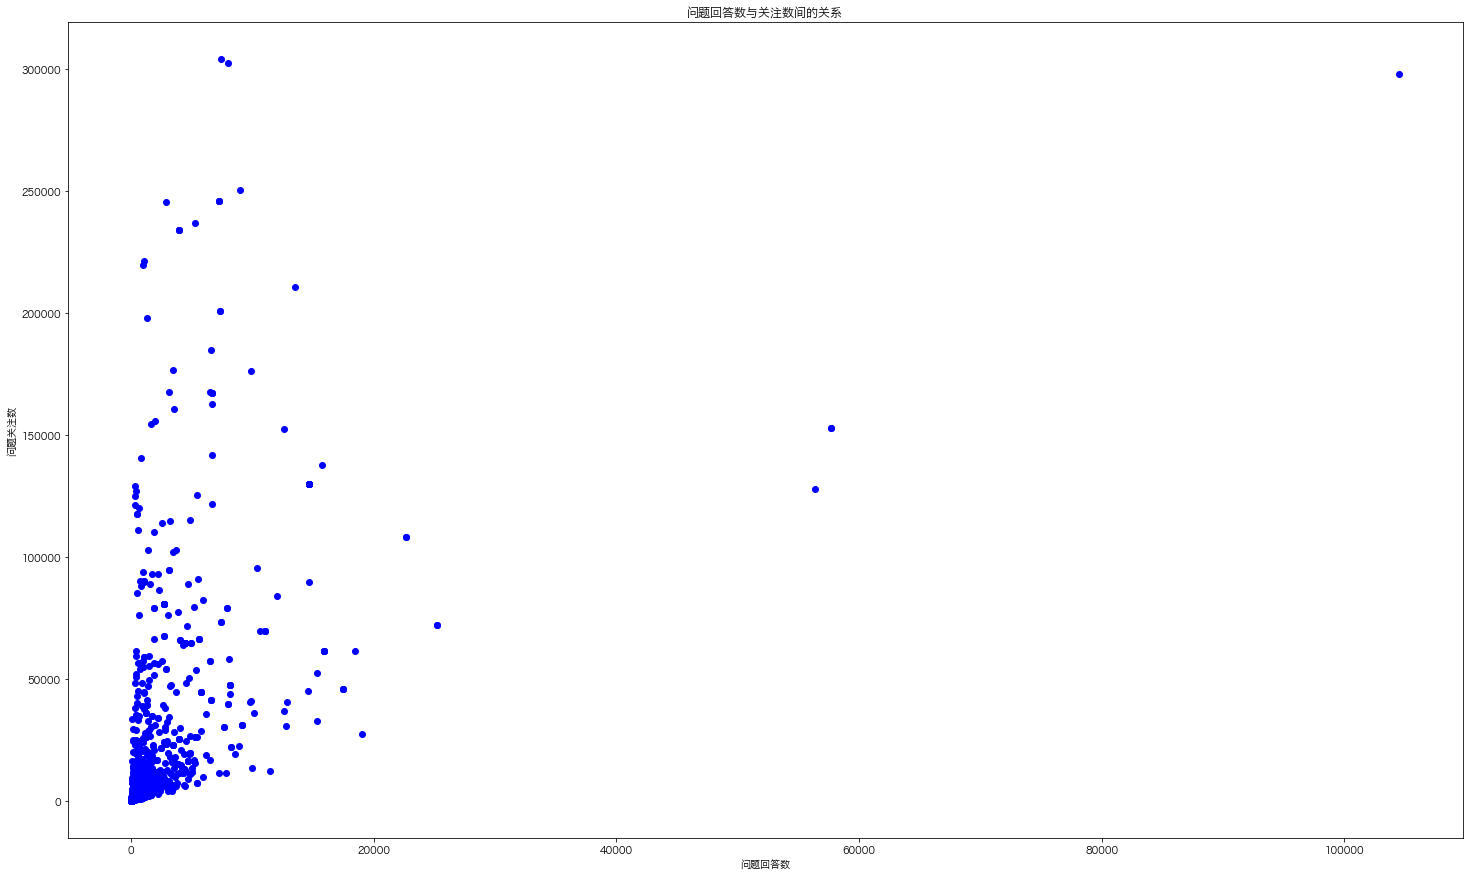

In [12]:
# 调用plt，作散点图
# plt.scatter（横坐标数值，纵坐标数值，颜色，标记符号
plt.scatter(b_x,b_y,color = 'b',marker='o')
# 设置图片标题
plt.title('问题回答数与关注数间的关系')
# 设置横坐标标签
plt.xlabel('问题回答数')
# 设置纵坐标标签
plt.ylabel('问题关注数')
# 设置图片大小
plt.rcParams['figure.figsize'] = (25,15)
# 展示图片
plt.show()

In [13]:
# task4--读取 CSV 格式文件“task_3.2_zhihu_timeline_article.csv”，
# 将数据命名为 zhihu_data_article，并查看 前部数据;
zhihu_data_article = pd.read_csv('/Users/apple/Desktop/task_3.2_zhihu_timeline_article.csv')
print(zhihu_data_article)

          类型               总 id                     关键词     文章 id  文章点赞数  \
0    article  14_1574825136.990                     李小璐  90620737    774   
1    article  14_1574825137.717                     主持人  90576308  25365   
2    article  13_1574825137.707                      刘涛  92353372    339   
3    article  14_1574825138.917                    网贷风险  83742265    149   
4    article  16_1574825138.573                陈情令（电视剧）  93060585     38   
..       ...                ...                     ...       ...    ...   
491  article  14_1574825320.773                     体制内  77431584    565   
492  article  15_1574825320.715                   香港娱乐圈  90663584    380   
493  article  16_1574825320.248                   加密/解密  93672329      1   
494  article  12_1574825320.700  李小璐 & PG_ONE（2017年末事件）  89556408   1485   
495  article  17_1574825320.876                      家居  88551490    134   

     文章评论数                   文章题目（文章没有感谢数）    文章观看数      文章创建时间  
0      267    “李小璐出轨视

In [14]:
print(zhihu_data_article.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   类型             496 non-null    object
 1   总 id           496 non-null    object
 2   关键词            496 non-null    object
 3   文章 id          496 non-null    int64 
 4   文章点赞数          496 non-null    int64 
 5   文章评论数          496 non-null    int64 
 6   文章题目（文章没有感谢数）  496 non-null    object
 7   文章观看数          496 non-null    int64 
 8   文章创建时间         496 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 35.0+ KB
None


In [15]:
print(zhihu_data_article.describe())

              文章 id         文章点赞数        文章评论数         文章观看数        文章创建时间
count  4.960000e+02    496.000000   496.000000  4.960000e+02  4.960000e+02
mean   8.677374e+07   2598.387097   295.633065  3.008528e+05  1.570314e+09
std    9.691967e+06   5882.901583   548.519490  5.473216e+05  9.563336e+06
min    2.289465e+07      0.000000     0.000000  6.000000e+00  1.476244e+09
25%    8.456310e+07     80.000000    18.500000  1.325450e+04  1.570257e+09
50%    8.944848e+07    512.000000   102.000000  9.642000e+04  1.572499e+09
75%    9.216102e+07   2147.000000   288.000000  3.441048e+05  1.573945e+09
max    9.388997e+07  48556.000000  4529.000000  4.059937e+06  1.574821e+09


In [16]:
print(zhihu_data_article.head())

        类型               总 id       关键词     文章 id  文章点赞数  文章评论数  \
0  article  14_1574825136.990       李小璐  90620737    774    267   
1  article  14_1574825137.717       主持人  90576308  25365   1157   
2  article  13_1574825137.707        刘涛  92353372    339     65   
3  article  14_1574825138.917      网贷风险  83742265    149     90   
4  article  16_1574825138.573  陈情令（电视剧）  93060585     38      1   

                  文章题目（文章没有感谢数）    文章观看数      文章创建时间  
0  “李小璐出轨视频曝光7天后，我识破了令人胆寒的爱情真相”   245037  1573089756  
1     谢娜与董卿同台被“碾压”: 文化断层到底有多可怕?  1072054  1573047546  
2                       刘涛，你够了！   215292  1574051699  
3             因面子，深陷网贷的我，最后这样上岸    63565  1569225309  
4       你是什么样的含光君？浅析剧版与书版蓝忘机的差异     2779  1574349813  


In [17]:
# task5--提取“task_3.2_zhihu_timeline_article.csv”中【文章点赞数】和【文章评论数】列数据，
# 制成散点图， 观察两者的关系
c = zhihu_data_article.loc[:,['文章点赞数','文章评论数']]
print(c)

     文章点赞数  文章评论数
0      774    267
1    25365   1157
2      339     65
3      149     90
4       38      1
..     ...    ...
491    565    148
492    380     65
493      1      0
494   1485    350
495    134     80

[496 rows x 2 columns]


In [18]:
# 设置横坐标
c_x = c.iloc[:,0].tolist()
print(c_x)

[774, 25365, 339, 149, 38, 305, 417, 2864, 2736, 171, 9247, 1018, 170, 1781, 2248, 468, 521, 2, 276, 565, 2313, 3, 2464, 2750, 1531, 76, 2, 1485, 100, 4636, 2147, 6438, 1843, 709, 1419, 2467, 28, 9771, 1003, 706, 398, 19, 1155, 9871, 2451, 786, 1, 553, 3742, 106, 2022, 5193, 29, 21652, 434, 16, 3711, 366, 1030, 10241, 2637, 273, 6133, 4030, 2119, 1974, 1010, 8, 927, 4199, 3347, 127, 1193, 13, 93, 364, 5649, 20148, 3877, 7, 3997, 28, 5399, 600, 4755, 1215, 3979, 2632, 498, 3478, 807, 6313, 26809, 1953, 909, 170, 485, 36, 328, 256, 1040, 99, 177, 9, 20, 1, 3117, 37, 1, 76, 1390, 148, 126, 6714, 32, 1, 1253, 26142, 1, 36, 4, 33, 6, 25829, 920, 619, 158, 35, 2, 45, 114, 1195, 3604, 1095, 783, 3, 6, 13, 1005, 293, 331, 800, 19, 3354, 11289, 370, 13, 315, 1165, 354, 563, 1, 628, 2978, 11, 4, 2940, 15547, 773, 316, 12311, 0, 131, 53, 2707, 656, 13, 1, 6468, 314, 307, 21009, 268, 19957, 503, 1044, 116, 2783, 4498, 1, 641, 2173, 1309, 1211, 1, 2, 142, 521, 74, 2529, 324, 400, 1122, 380, 32, 876

In [19]:
# 设置纵坐标
c_y = c.iloc[:,1].tolist()
print(c_y)

[267, 1157, 65, 90, 1, 200, 48, 234, 95, 15, 693, 201, 232, 270, 1568, 220, 292, 0, 315, 148, 89, 1, 235, 467, 360, 14, 0, 350, 81, 188, 53, 552, 328, 106, 855, 258, 15, 359, 76, 38, 102, 22, 825, 526, 142, 77, 2, 177, 221, 26, 568, 654, 20, 840, 41, 69, 1137, 38, 51, 227, 633, 113, 324, 3453, 169, 272, 102, 7, 1308, 304, 425, 75, 92, 37, 35, 112, 348, 4529, 117, 4, 419, 32, 403, 216, 140, 173, 1101, 65, 718, 219, 193, 766, 2162, 176, 192, 16, 35, 10, 92, 17, 126, 33, 229, 8, 4, 0, 284, 15, 0, 20, 243, 21, 40, 201, 6, 0, 354, 3254, 0, 12, 0, 6, 0, 1117, 124, 269, 40, 2, 3, 17, 3, 189, 1145, 726, 178, 3, 0, 6, 297, 256, 48, 274, 55, 239, 1493, 30, 8, 288, 117, 73, 35, 0, 132, 814, 1, 0, 675, 1441, 93, 69, 248, 0, 147, 11, 842, 250, 0, 0, 329, 61, 38, 800, 208, 620, 26, 12, 385, 603, 736, 0, 76, 113, 1415, 258, 0, 0, 38, 76, 42, 173, 55, 714, 140, 65, 0, 127, 5, 0, 23, 19, 226, 67, 73, 1663, 17, 109, 278, 64, 19, 194, 2, 172, 1110, 244, 21, 2058, 3, 1157, 267, 111, 90, 124, 48, 263, 1, 3

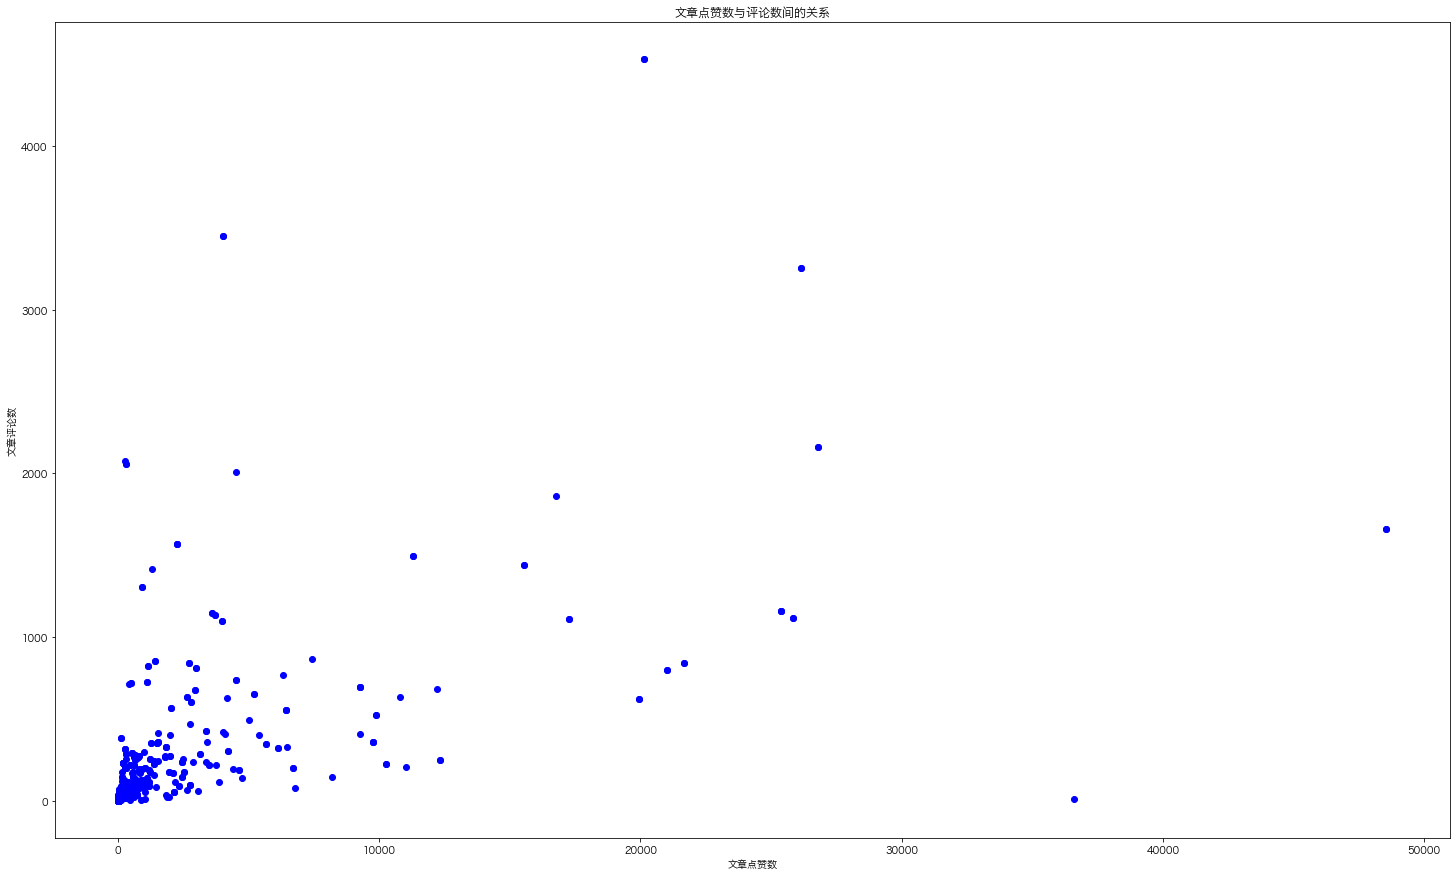

In [20]:
# 调用plt，作散点图
# plt.scatter（横坐标数值，纵坐标数值，颜色，标记符号）
plt.scatter(c_x,c_y,color = 'b',marker='o')
# 设置图片标题
plt.title('文章点赞数与评论数间的关系')
# 设置横坐标标签
plt.xlabel('文章点赞数')
# 设置纵坐标标签
plt.ylabel('文章评论数')
# 设置图片大小
plt.rcParams['figure.figsize'] = (25,15)
# 展示图片
plt.show()

In [21]:
# task6--提取“task_3.2_zhihu_timeline_article.csv”中【文章点赞数】低于 1000 的行数据，
# 作出箱型图(阅读参 考文章 5)
d = zhihu_data_article[zhihu_data_article['文章点赞数'] < 1000]['文章点赞数']
print(d)
print('-'*30)
print(type(d))

0      774
2      339
3      149
4       38
5      305
      ... 
489    417
491    565
492    380
493      1
495    134
Name: 文章点赞数, Length: 305, dtype: int64
------------------------------
<class 'pandas.core.series.Series'>


In [22]:
d_x = d.tolist()
print(d_x)

[774, 339, 149, 38, 305, 417, 171, 170, 468, 521, 2, 276, 565, 3, 76, 2, 100, 709, 28, 706, 398, 19, 786, 1, 553, 106, 29, 434, 16, 366, 273, 8, 927, 127, 13, 93, 364, 7, 28, 600, 498, 807, 909, 170, 485, 36, 328, 256, 99, 177, 9, 20, 1, 37, 1, 76, 148, 126, 32, 1, 1, 36, 4, 33, 6, 920, 619, 158, 35, 2, 45, 114, 783, 3, 6, 13, 293, 331, 800, 19, 370, 13, 315, 354, 563, 1, 628, 11, 4, 773, 316, 0, 131, 53, 656, 13, 1, 314, 307, 268, 503, 116, 1, 641, 1, 2, 142, 521, 74, 324, 400, 380, 32, 876, 80, 19, 620, 107, 399, 106, 304, 661, 177, 200, 859, 545, 305, 53, 774, 529, 149, 222, 417, 712, 1, 339, 7, 170, 305, 468, 521, 134, 1, 680, 1, 1, 3, 565, 276, 76, 1, 165, 709, 6, 266, 25, 121, 10, 706, 553, 26, 35, 29, 8, 1, 26, 106, 724, 8, 75, 366, 273, 786, 8, 927, 2, 128, 3, 153, 364, 247, 129, 13, 829, 1, 171, 226, 909, 398, 170, 17, 99, 600, 919, 3, 348, 469, 76, 5, 9, 148, 328, 12, 9, 36, 34, 37, 1, 2, 15, 619, 38, 36, 76, 52, 158, 20, 3, 13, 121, 800, 315, 628, 45, 1, 177, 0, 4, 7, 354, 5

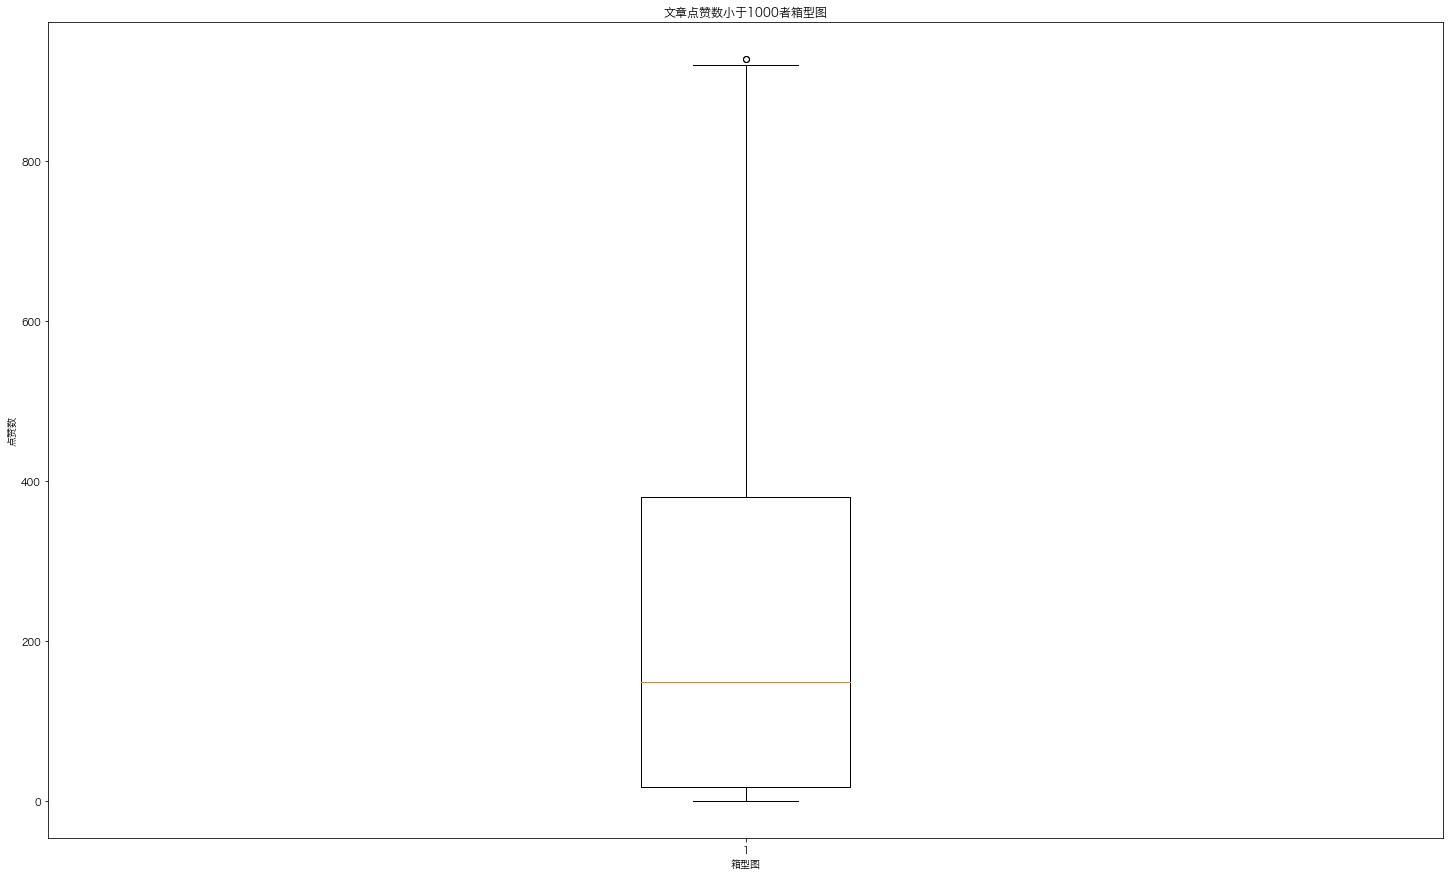

In [23]:
# 调用plt，作箱型图
# plt.boxplot(x)
plt.boxplot(d_x)
# 设置图片标题
plt.title('文章点赞数小于1000者箱型图')
# 设置图片横轴标签
plt.xlabel("箱型图")
# 设置图片纵轴标签
plt.ylabel("点赞数")
# 设置图片大小
plt.rcParams['figure.figsize'] = (25,15)
# 展示图片
plt.show()